# Understanding Heart Disease with Machine Learning and Statistical Techniques

## Import the libraries

In [1]:
# import necessary libraries
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import math
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import plotly.figure_factory as ff

from scipy import stats
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

## Loading Data 

In [2]:
# load the data
data_path = 'dataset/Heart_dirty.xlsx'
df = pd.read_excel(data_path)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,Typical Angina,125,212,<=120mg/dl,ST-T Wave Abnormality,168,No,1.0,Downsloping,2,Reversible Defect,Normal
1,53,Male,TA,140,203,>120mg/dl,Normal,155,Yes,3.1,Upsloping,0,Reversible Defect,Normal
2,70,Male,Typical Angina,145,174,<=120mg/dl,ST-T Wave Abnormality,125,Yes,2.6,Upsloping,0,Reversible Defect,Normal
3,61,M,Typical Angina,148,203,<=120mg/dl,ST-T Wave Abnormality,161,No,0.0,Downsloping,1,Reversible Defect,Normal
4,62,F,TA,138,294,>120mg/dl,ST-T Wave Abnormality,106,No,1.9,Flat,3,Normal Blood Flow,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical Angina,140,221,<=120mg/dl,ST-T Wave Abnormality,164,Yes,0.0,Downsloping,0,Normal Blood Flow,Heart Disease
1021,60,Male,Typical Angina,125,258,<=120mg/dl,Normal,141,Yes,2.8,Flat,1,Reversible Defect,Normal
1022,47,Male,TA,110,275,<=120mg/dl,Normal,118,Yes,1.0,Flat,1,Normal Blood Flow,Normal
1023,50,Female,Typical Angina,110,254,<=120mg/dl,Normal,159,No,0.0,Downsloping,0,Normal Blood Flow,Heart Disease


## Description of DataFrame
Import the csv file containing the description of each field in the dataset

In [3]:
description = pd.read_csv('dataset/heart-glossary.csv')

# view the description DataFrame
description

,Column,Source,Description,Remarks
0,age,UCI Machine Learning Repository,Age of patient,Unit in Years
1,sex,UCI Machine Learning Repository,"Sex of the patient (Male, Female)",Male or Female
2,cp,UCI Machine Learning Repository,Chestpain Type,"Typical Angina (TA), Atypical Angina (ATA), No..."
3,tresbps,UCI Machine Learning Repository,Resting blood pressure (On admission to the ho...,Unit in mm Hg
4,chol,UCI Machine Learning Repository,Serum cholesterol,Unit in mm/dl
5,fbs,UCI Machine Learning Repository,Fasting blood sugar. More than 120mg/dl consid...,>120mg/dl or <=120mg/dl
6,restecg,UCI Machine Learning Repository,Resting electrocardiogram results,"Normal, ST-T wave abnormality, Left ventricula..."
7,thalach,UCI Machine Learning Repository,MaxHR: maximum heart rate achieved,Numeric value between 60 and 202
8,exang,UCI Machine Learning Repository,ExerciseAngina: exercise-induced angina,Yes or No
9,oldpeak,UCI Machine Learning Repository,ST depression induced by exercise relative to ...,Numeric value measured in depression


## Initial Data Exploration (Data Understanding)

### Data Selection

In selecting which data to include and exclude from the analysis, it was decided that the entire dataset should be included without omitting any rows due to the following reasons:

- Complete data / avoiding bias: The data at hand does not contain any empty cells which is ideal in this project as the bulk of the efforts can be directed to developing the right model instead of finding the best methods of imputation / deletion to deal with the missing values. By including the entire dataset, we are able to analyse the entire population and not just a subset. This also allows us to avoid potential biases and ensures that our analysis is based on a complete and representative sample

- Diversity of patients: The dataset contains information about patients with different characteristics such as age, sex, and types of chest pains among others. Including the entire population and not just a subset may allow us to identify trends and patters that may be missed if we used a smaller sample instead. Although there are inconsistencies with the data (e.g. "m", "M", "male", and "Male" being used to describe the male population), this can easily be cleaned prior to the Modelling stage

### Understanding Data Structure

In [4]:
#check unique column
df.columns.unique()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
# Check unique values for selected columns
for feature in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'ca', 'thal', 'target']:
    feature_unique = df[feature].unique()
    print(feature, len(feature_unique), 'unique values are:', feature_unique)

sex 8 unique values are: ['Male' 'M' 'F' 'Female' 'female' 'f' 'male' 'm']
cp 6 unique values are: ['Typical Angina' 'TA' 'NTA' 'Non-Anginal Pain' 'Atypical Angina'
 'Asymptomatic']
fbs 2 unique values are: ['<=120mg/dl' '>120mg/dl']
restecg 4 unique values are: ['ST-T Wave Abnormality' 'Normal' 'Left Ventricular Hypertrophy' 'LVH']
exang 2 unique values are: ['No' 'Yes']
ca 5 unique values are: [2 0 1 3 4]
thal 4 unique values are: ['Reversible Defect' 'Normal Blood Flow' 'Fixed Defect' 'Null']
target 2 unique values are: ['Normal' 'Heart Disease']


From the ouput above, we can see that the following columns possess inconsistent data:

- `sex`: "m", "M", "male", and "Male" are being used to describe the male population while "f", "F", "female", and "Female" being used to describe the female population

- `cp`: Both "TA" and "Typical Angina" refer to the same type of chest pain, Typical Angina, while "NTA" & "Atypical Angina" both refer to Atypical Angina

- `restecg`: "LVH" & "Left Ventricular Hypertrophy" both refer to the same resting electrocardiogram result
- `ca`: Contain the values (0 - 4). However when crosschecked against the heart-glossary.csv file, we can see that the values to be expected are (0 - 3) only
- `thal`: Contain 'Null' which need to be cleaned.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   object 
 6   restecg   1025 non-null   object 
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   object 
 13  target    1025 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 112.2+ KB


### Checking Missing Values

In [7]:
print(df.isnull().values.any())
print(df.isnull().sum())

False
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


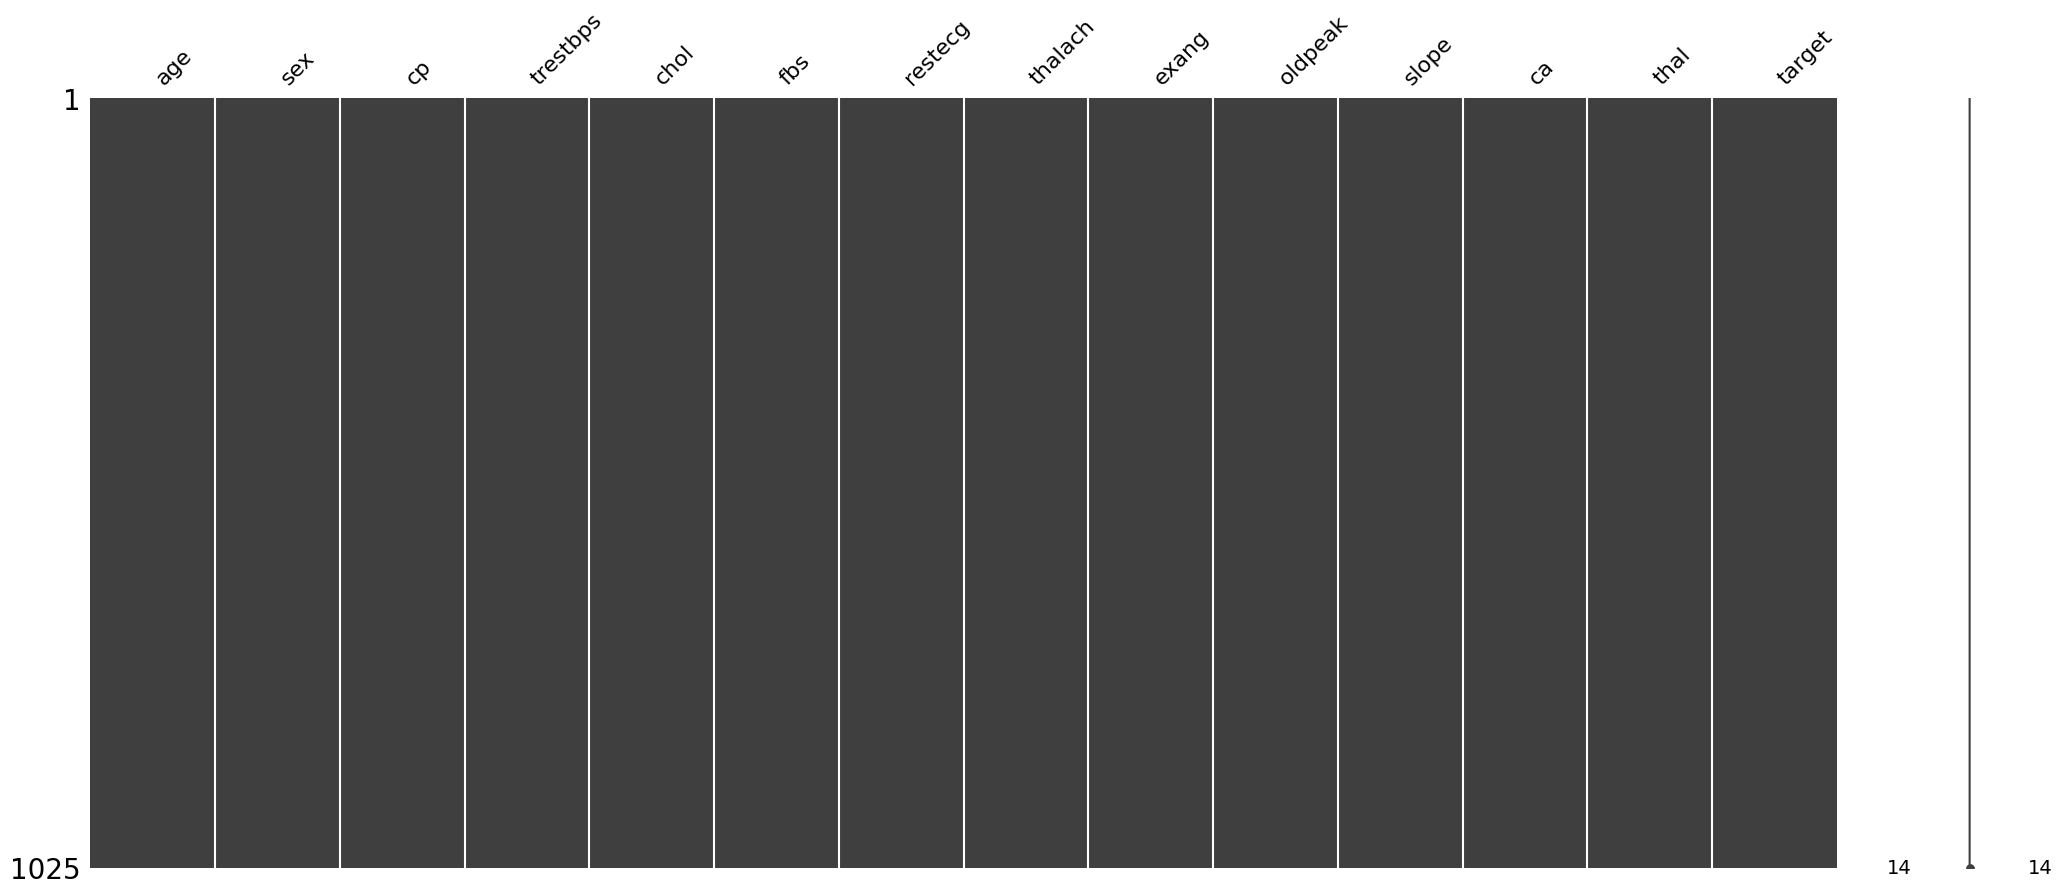

In [8]:
# Visualize missing values using a matrix plot
msno.matrix(df)
plt.show()

From the observations, there is no missing value found

### Checking Duplicate Data

In [9]:
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows in df:", num_duplicates)

Number of duplicate rows in df: 524


From the observations, there are duplicates in the dataframe

### Checking Outliers From Continuous Variables
There are several ways to check outliers:
- Checking from data description by comparing the mean, median and max
- Violin plot, boxplot and histogram to visualize the outliers

#### Dataframe's Description

In [10]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.754146
std,9.072290,17.516718,51.59251,23.005724,1.175053,1.030798
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,0.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,4.000000


Based on the description provided by the `describe()` fucntion, we can very quickly make assumptions on the data and potential outliers. For example, when looking at the `'chol'` column, we can see that the **max** value of *564* is much greater than the **mean** value of *246.5*

#### Visualize The Outliers

In [11]:
# Define a function to create violin plots for multiple columns
def plot_violin(df, columns, columns_per_row):
    """
    Creates a grid of violin plots for multiple columns in a DataFrame.

    Parameters:
        - df (pd.DataFrame): DataFrame containing the data to be plotted.
        - columns (list): List of column names to create violin plots for.
        - columns_per_row (int): Number of columns to display per row in the grid. Default is 3.

    Returns:
        None
    """
    num_plots = len(columns)
    num_rows = math.ceil(num_plots / columns_per_row)
    fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 5*num_rows))
    axes = axes.ravel()
    
    for i, col in enumerate(columns):
        sns.violinplot(x=col, data=df, ax=axes[i])
        axes[i].set_title(f'Violin Plot: {col}')
        
    # Remove extra axes
    for j in range(num_plots, num_rows * columns_per_row):
        axes[j].remove()
    
    plt.tight_layout()
    plt.show()

# Define a function to create box plots for multiple columns
def plot_box(df, columns, columns_per_row):
    """
    Creates a grid of violin plots for multiple columns in a DataFrame.

    Parameters:
        - df (pd.DataFrame): DataFrame containing the data to be plotted.
        - columns (list): List of column names to create box plots for.
        - columns_per_row (int): Number of columns to display per row in the grid. Default is 3.

    Returns:
        None
    """
    num_plots = len(columns)
    num_rows = math.ceil(num_plots / columns_per_row)
    fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 5*num_rows))
    axes = axes.ravel()
    
    for i, col in enumerate(columns):
        sns.boxplot(x=col, data=df, ax=axes[i])
        axes[i].set_title(f'Box Plot: {col}')
        
    # Remove extra axes
    for j in range(num_plots, num_rows * columns_per_row):
        axes[j].remove()
    
    plt.tight_layout()
    plt.show()

def plot_histogram(df, columns, columns_per_row):
    """
    Plot histograms for multiple columns in a grid layout with grids and distribution lines.

    Parameters:
        -- df (pd.DataFrame): The DataFrame containing the data to be plotted.
        -- columns (list): The list of column names for which histograms are to be plotted.
        -- columns_per_row (int): The number of columns to be displayed per row in the grid. Default is 3.

    Returns:
        None
    """
    num_plots = len(columns)
    num_rows = math.ceil(num_plots / columns_per_row)
    fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 5*num_rows))
    axes = axes.ravel()
    
    for i, col in enumerate(columns):
        sns.histplot(df[col], ax=axes[i], kde=True, color='steelblue')
        axes[i].axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=2)
        axes[i].set_title(f'Histogram: {col}')
        
    # Remove extra axes
    for j in range(num_plots, num_rows * columns_per_row):
        axes[j].remove()
    
    plt.tight_layout()
    plt.show()

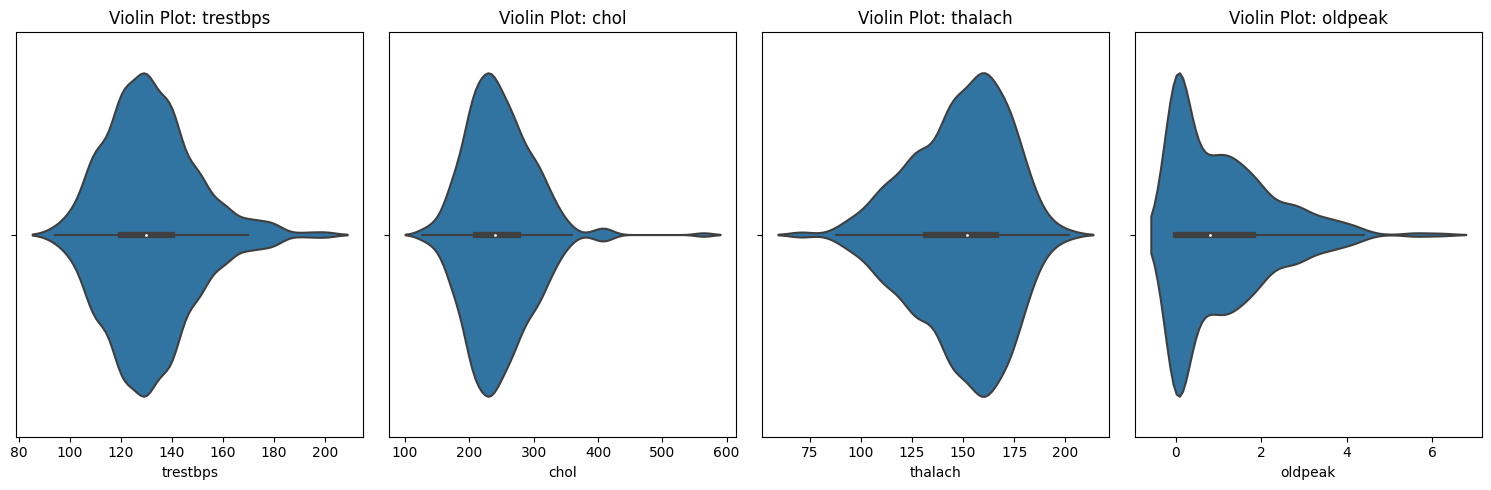

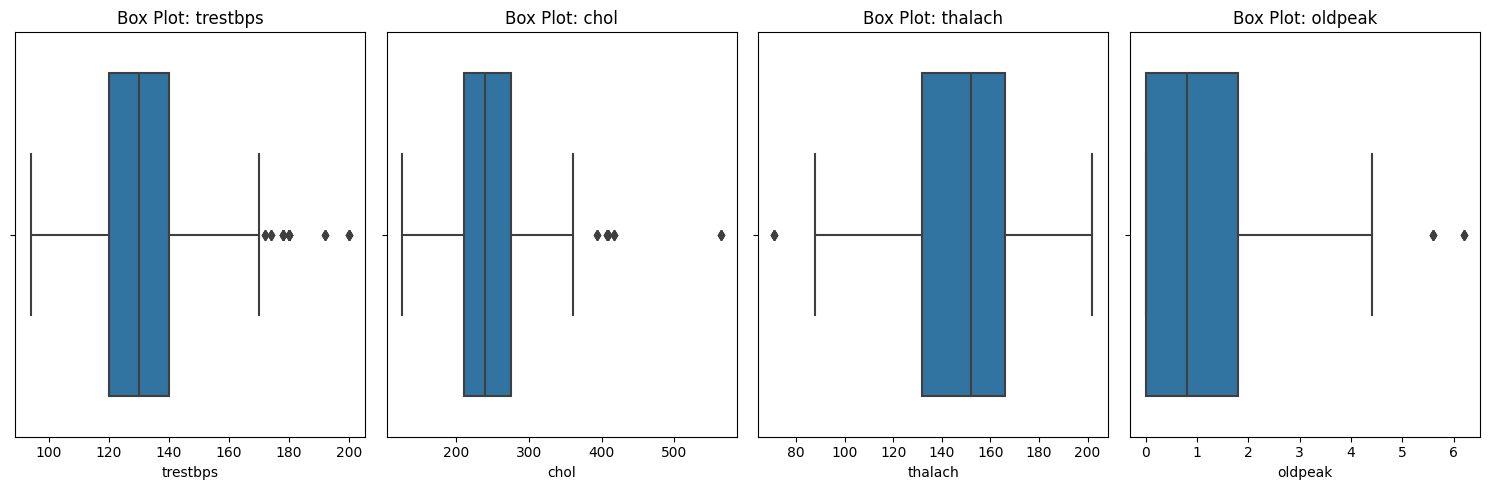

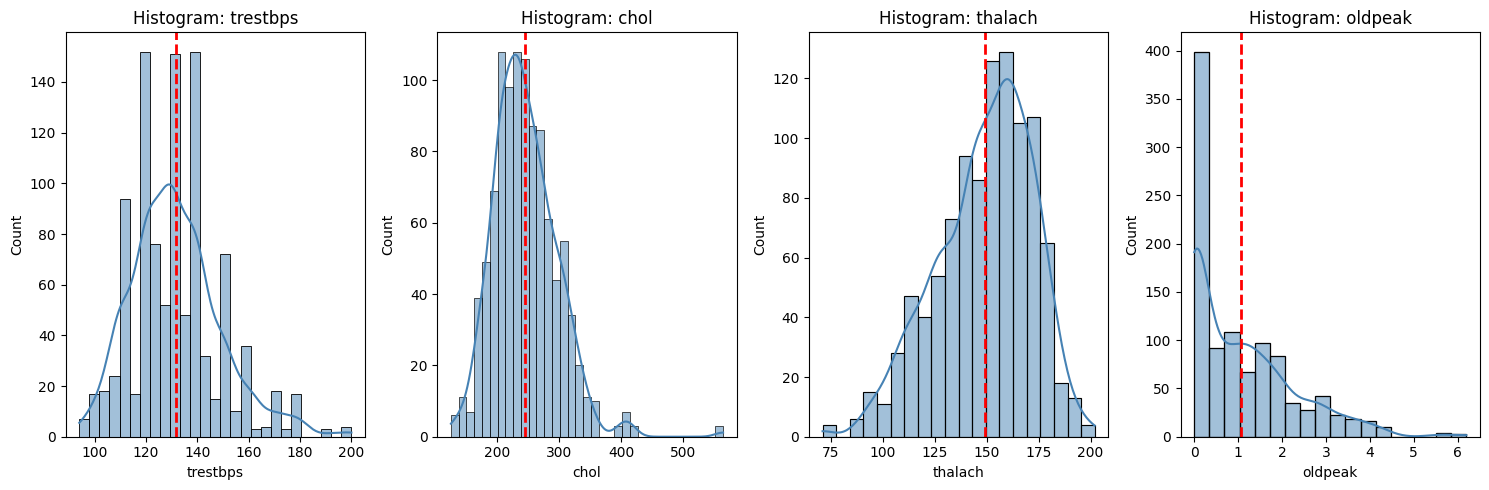

In [12]:
# select continuous variable
selected_columns = ['trestbps', 'chol', 'thalach', 'oldpeak']

# choose the grid columns
columns_per_row = 4

# plot the graphs
plot_violin(df, selected_columns, columns_per_row)
plot_box(df, selected_columns, columns_per_row)
plot_histogram(df, selected_columns, columns_per_row)

Based on the plots generated, we can visualise the distribution of the dataset. Referencing the previous example, the 'chol' column, we can indeed see that the graph is skewed to the right due to outliers.

The 'age' column is ignored as age is not necessarily indicative of a heart disease onset. Any outliers in this case may be meaningful data. The 'ca' column is ignored as it contains discrete values with no natural order/scale which may yield meaningless results when assessing with techniques like Z-Scoring or the Interquartile Range (IQR) method.

Since there are outliers in 'trestbps', 'chol', 'thalach' and 'oldpeak'. We need to fix these outliers to achieve better data quality and better results.

## Data Preprocessing
We found out that the dirty data is within the dataframe hence we will perform data cleaning to curb the problematic data.

### Renaming Dataframe's header
Rename the columns header with more intuitive/descriptive names so that the analysis can be done with greater ease.

In [13]:
## rename columns
df = df.rename(columns={'cp' : 'chest_pain_type', 'trestbps' : 'resting_blood_pressure',
                       'chol' : 'cholestrol', 'fbs' : 'fasting_blood_sugar', 'restecg' : 'resting_ecg',
                       'thalach' : 'max_heart_rate', 'exang' : 'exercise_induced_angina',
                       'oldpeak' : 'depression_level', 'slope' : 'peak_exercise_st_slope',
                       'ca' : 'number_of_major_vessels', 'thal' : 'thalassemia_disorder'})
df

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,depression_level,peak_exercise_st_slope,number_of_major_vessels,thalassemia_disorder,target
0,52,Male,Typical Angina,125,212,<=120mg/dl,ST-T Wave Abnormality,168,No,1.0,Downsloping,2,Reversible Defect,Normal
1,53,Male,TA,140,203,>120mg/dl,Normal,155,Yes,3.1,Upsloping,0,Reversible Defect,Normal
2,70,Male,Typical Angina,145,174,<=120mg/dl,ST-T Wave Abnormality,125,Yes,2.6,Upsloping,0,Reversible Defect,Normal
3,61,M,Typical Angina,148,203,<=120mg/dl,ST-T Wave Abnormality,161,No,0.0,Downsloping,1,Reversible Defect,Normal
4,62,F,TA,138,294,>120mg/dl,ST-T Wave Abnormality,106,No,1.9,Flat,3,Normal Blood Flow,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical Angina,140,221,<=120mg/dl,ST-T Wave Abnormality,164,Yes,0.0,Downsloping,0,Normal Blood Flow,Heart Disease
1021,60,Male,Typical Angina,125,258,<=120mg/dl,Normal,141,Yes,2.8,Flat,1,Reversible Defect,Normal
1022,47,Male,TA,110,275,<=120mg/dl,Normal,118,Yes,1.0,Flat,1,Normal Blood Flow,Normal
1023,50,Female,Typical Angina,110,254,<=120mg/dl,Normal,159,No,0.0,Downsloping,0,Normal Blood Flow,Heart Disease


### Handling Inconsistent Data
From the previous data exploration, we found out that the `sex`, `chest_pain_type`, `resting_ecg`, `number_of_major_vessels` and `thalassemia_disorder` contain inconsistent data. It is crucial to fix this problem so that the analysis will not bias towards the wrong data.

In [14]:
# standardising sex to Male and Female
df['sex'] = df['sex'].apply(lambda x: 'Male' if x == 'm' or x == 'M' or x == 'male' or x == 'Male' else 'Female')


# standardising chest_pain_type to Typical Angina, Atypical Angina, Non-Anginal Pain and Asymptomatic
def  chest_pain_type_condition(x):
    if x == 'TA' or x == 'Typical Angina':
        return 'Typical Angina'
    elif x == 'NTA' or x == 'Atypical Angina':
        return 'Atypical Angina'
    elif x == 'Asymptomatic':
        return 'Asymptomatic'
    else:
        return 'Non-Anginal Pain'

df['chest_pain_type'] = df['chest_pain_type'].apply(chest_pain_type_condition)

# standardising resting_ecg to ST-T Wave Abnormality, Normal and Left Ventricular Hypertrophy
def  resting_ecg_condition(x):
    if x == 'LVH' or x == 'Left Ventricular Hypertrophy':
        return 'Left Ventricular Hypertrophy'
    elif x == 'Normal':
        return 'Normal'
    else:
        return 'ST-T Wave Abnormality'

df['resting_ecg'] = df['resting_ecg'].apply(resting_ecg_condition)

# fix invalid data within number_of_major_vessels and impute it with mode
df['number_of_major_vessels'] = df['number_of_major_vessels'].replace(4, np.nan).fillna(df['number_of_major_vessels'].mode()[0])
df['number_of_major_vessels'] = df['number_of_major_vessels'].astype(int)
df['number_of_major_vessels'] = df['number_of_major_vessels'].astype(str)

# Fix 'Null' within thalassemia_disorder and impute with mode
df['thalassemia_disorder'] = df['thalassemia_disorder'].replace("Null", np.nan).fillna(df['thalassemia_disorder'].mode()[0])
df['thalassemia_disorder'] = df['thalassemia_disorder'].astype(str)

In [15]:
# Validate the unique values for selected columns
for feature in ['sex', 'chest_pain_type', 'resting_ecg', 'number_of_major_vessels', 'thalassemia_disorder']:
    feature_unique = df[feature].unique()
    print(feature, len(feature_unique), 'unique values are:', feature_unique)

sex 2 unique values are: ['Male' 'Female']
chest_pain_type 4 unique values are: ['Typical Angina' 'Atypical Angina' 'Non-Anginal Pain' 'Asymptomatic']
resting_ecg 3 unique values are: ['ST-T Wave Abnormality' 'Normal' 'Left Ventricular Hypertrophy']
number_of_major_vessels 4 unique values are: ['2' '0' '1' '3']
thalassemia_disorder 3 unique values are: ['Reversible Defect' 'Normal Blood Flow' 'Fixed Defect']


From the validation result, the inconsistent data within the affected columns were fixed.

### Handling Duplicate Data
From previous observations, there are 723 records in the dataframe that need to be removed.

In [16]:
#drop duplicate data
df.drop_duplicates(inplace=True, ignore_index=True)

### Handling Outliers
Fix outliers in 'resting_blood_pressure', 'cholestrol', 'max_heart_rate' and 'depression_level' to achieve better data quality by calculating the Z-score for each continuous variable and drop the outliers.

In [17]:
# removing outliers using the Z-Scoring method
# setting a threshold of 3 to assess the Z-Score againts
threshold = 3

# calculating the z_scores for the columns to assess
resting_blood_pressure_z_scores = np.abs(stats.zscore(df['resting_blood_pressure']))
cholestrol_z_scores = np.abs(stats.zscore(df['cholestrol']))
max_heart_rate_z_scores = np.abs(stats.zscore(df['max_heart_rate']))
depression_level_z_scores = np.abs(stats.zscore(df['depression_level']))

# aggregating the indices of the records that contain outliers 
outliers = np.where(resting_blood_pressure_z_scores > threshold) + np.where(cholestrol_z_scores > threshold) + np.where(max_heart_rate_z_scores > threshold) + np.where(depression_level_z_scores > threshold)

print(outliers)

(array([124, 142], dtype=int64), array([104, 128, 144, 260], dtype=int64), array([188], dtype=int64), array([51, 63], dtype=int64))


In [18]:
# dropping the records that contain outliers
i = 0
df_clean = df.copy()
while i < len(outliers):
    df_clean.drop(outliers[i], inplace=True)
    i += 1

# resetting the index of the DataFrame
df_clean.reset_index(drop=True, inplace=True)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      293 non-null    int64  
 1   sex                      293 non-null    object 
 2   chest_pain_type          293 non-null    object 
 3   resting_blood_pressure   293 non-null    int64  
 4   cholestrol               293 non-null    int64  
 5   fasting_blood_sugar      293 non-null    object 
 6   resting_ecg              293 non-null    object 
 7   max_heart_rate           293 non-null    int64  
 8   exercise_induced_angina  293 non-null    object 
 9   depression_level         293 non-null    float64
 10  peak_exercise_st_slope   293 non-null    object 
 11  number_of_major_vessels  293 non-null    object 
 12  thalassemia_disorder     293 non-null    object 
 13  target                   293 non-null    object 
dtypes: float64(1), int64(4), o

Now visualize the continuous variables to search for outlier again

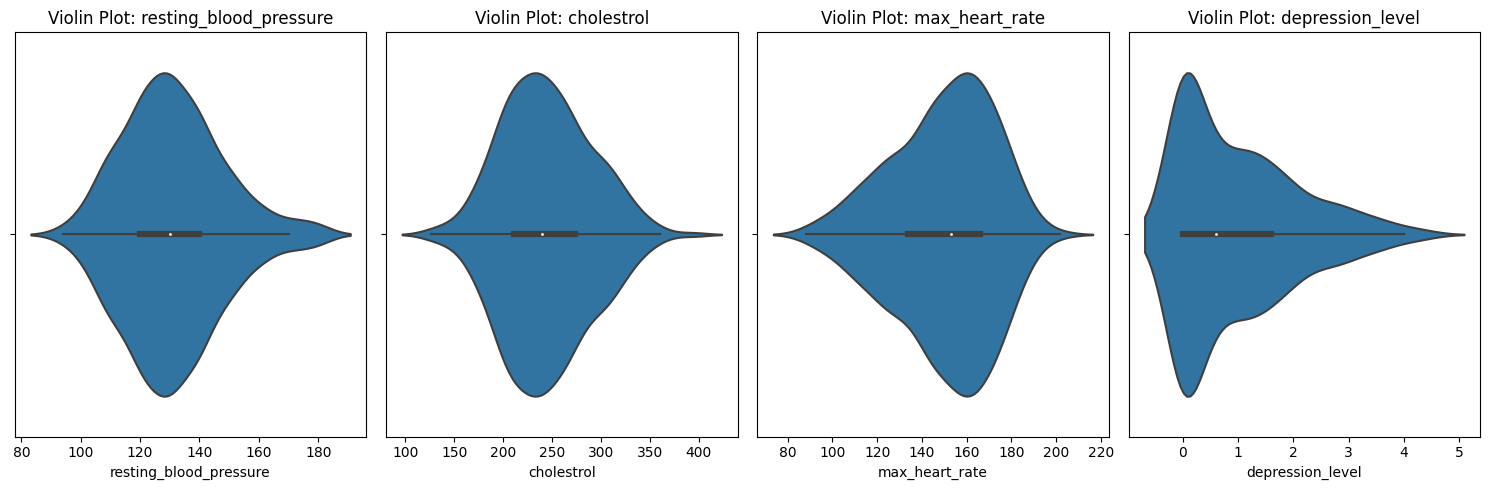

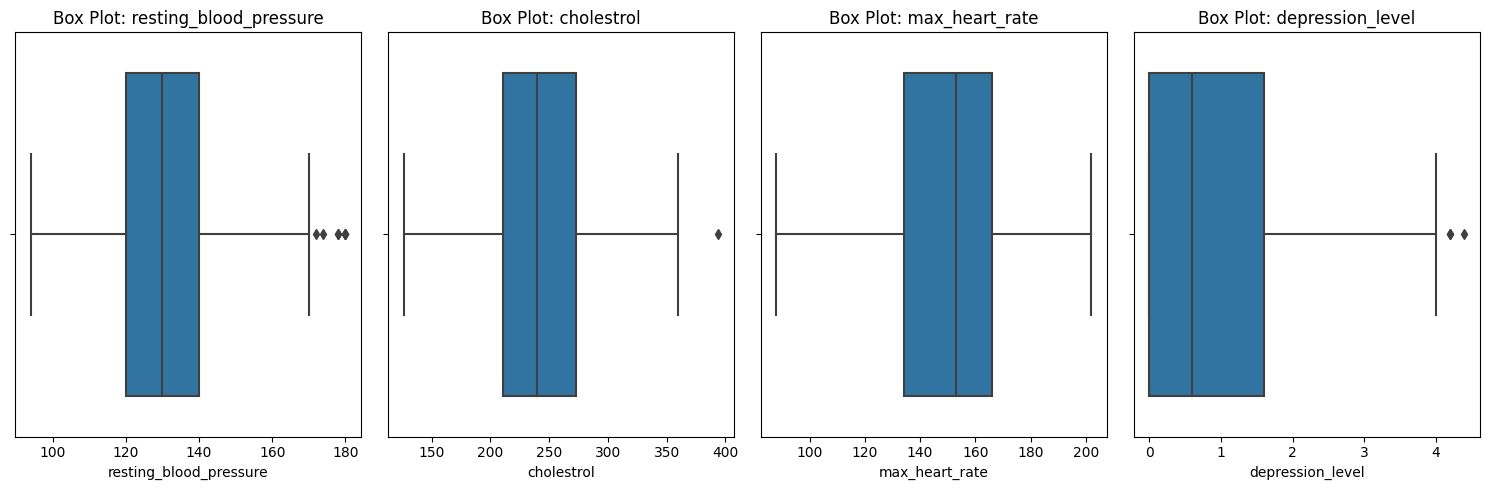

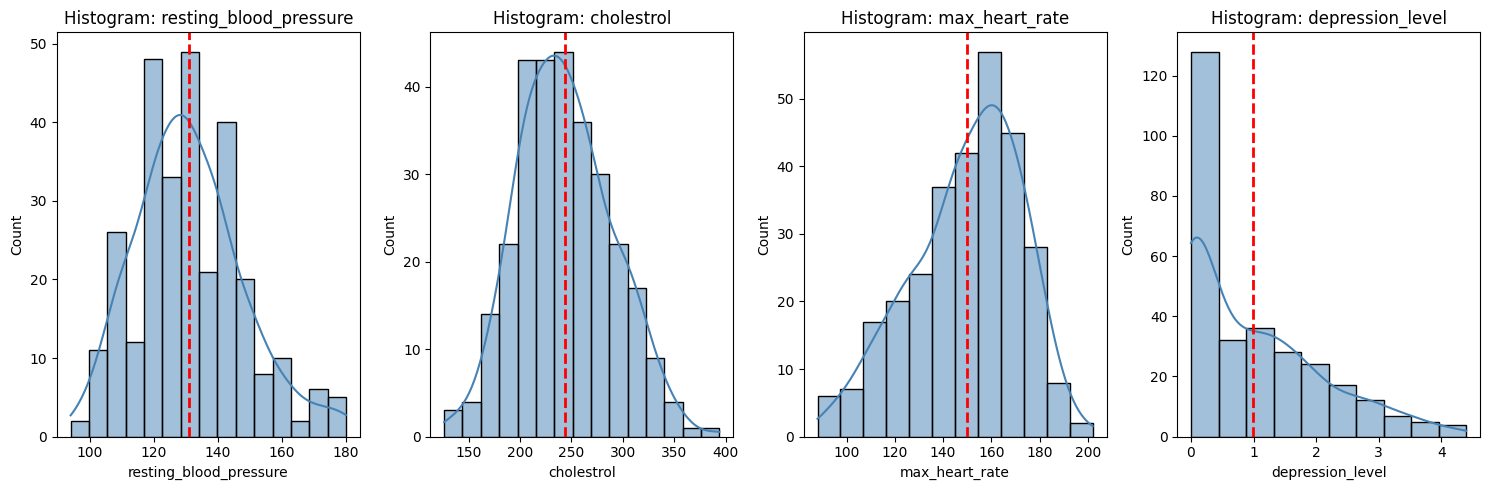

In [19]:
# select continuous variable
selected_columns = ['resting_blood_pressure', 'cholestrol', 'max_heart_rate', 'depression_level']

# choose the grid columns
columns_per_row = 4

# plot the graphs
plot_violin(df_clean, selected_columns, columns_per_row)
plot_box(df_clean, selected_columns, columns_per_row)
plot_histogram(df_clean, selected_columns, columns_per_row)

We can see that the 'resting_blood_pressure', 'cholestrol' and 'max_heart_rate' plots do appear to be more normally distributed. The 'depression_level' plot however does not look significantly more normally distributed. This could be because of the small data size at hand which may not be indicative of the depression levels of the greater population of people who suffer heart diseases. Hence, no further processing is to be done on the 'depression_level' column

## Exploratory Data Analysis (EDA)
- Data Overview
- Data Visualization for deeper analysis
- Data transformation
- Data correlation

### Data Overview
Visualize the distribution of the data in histogram

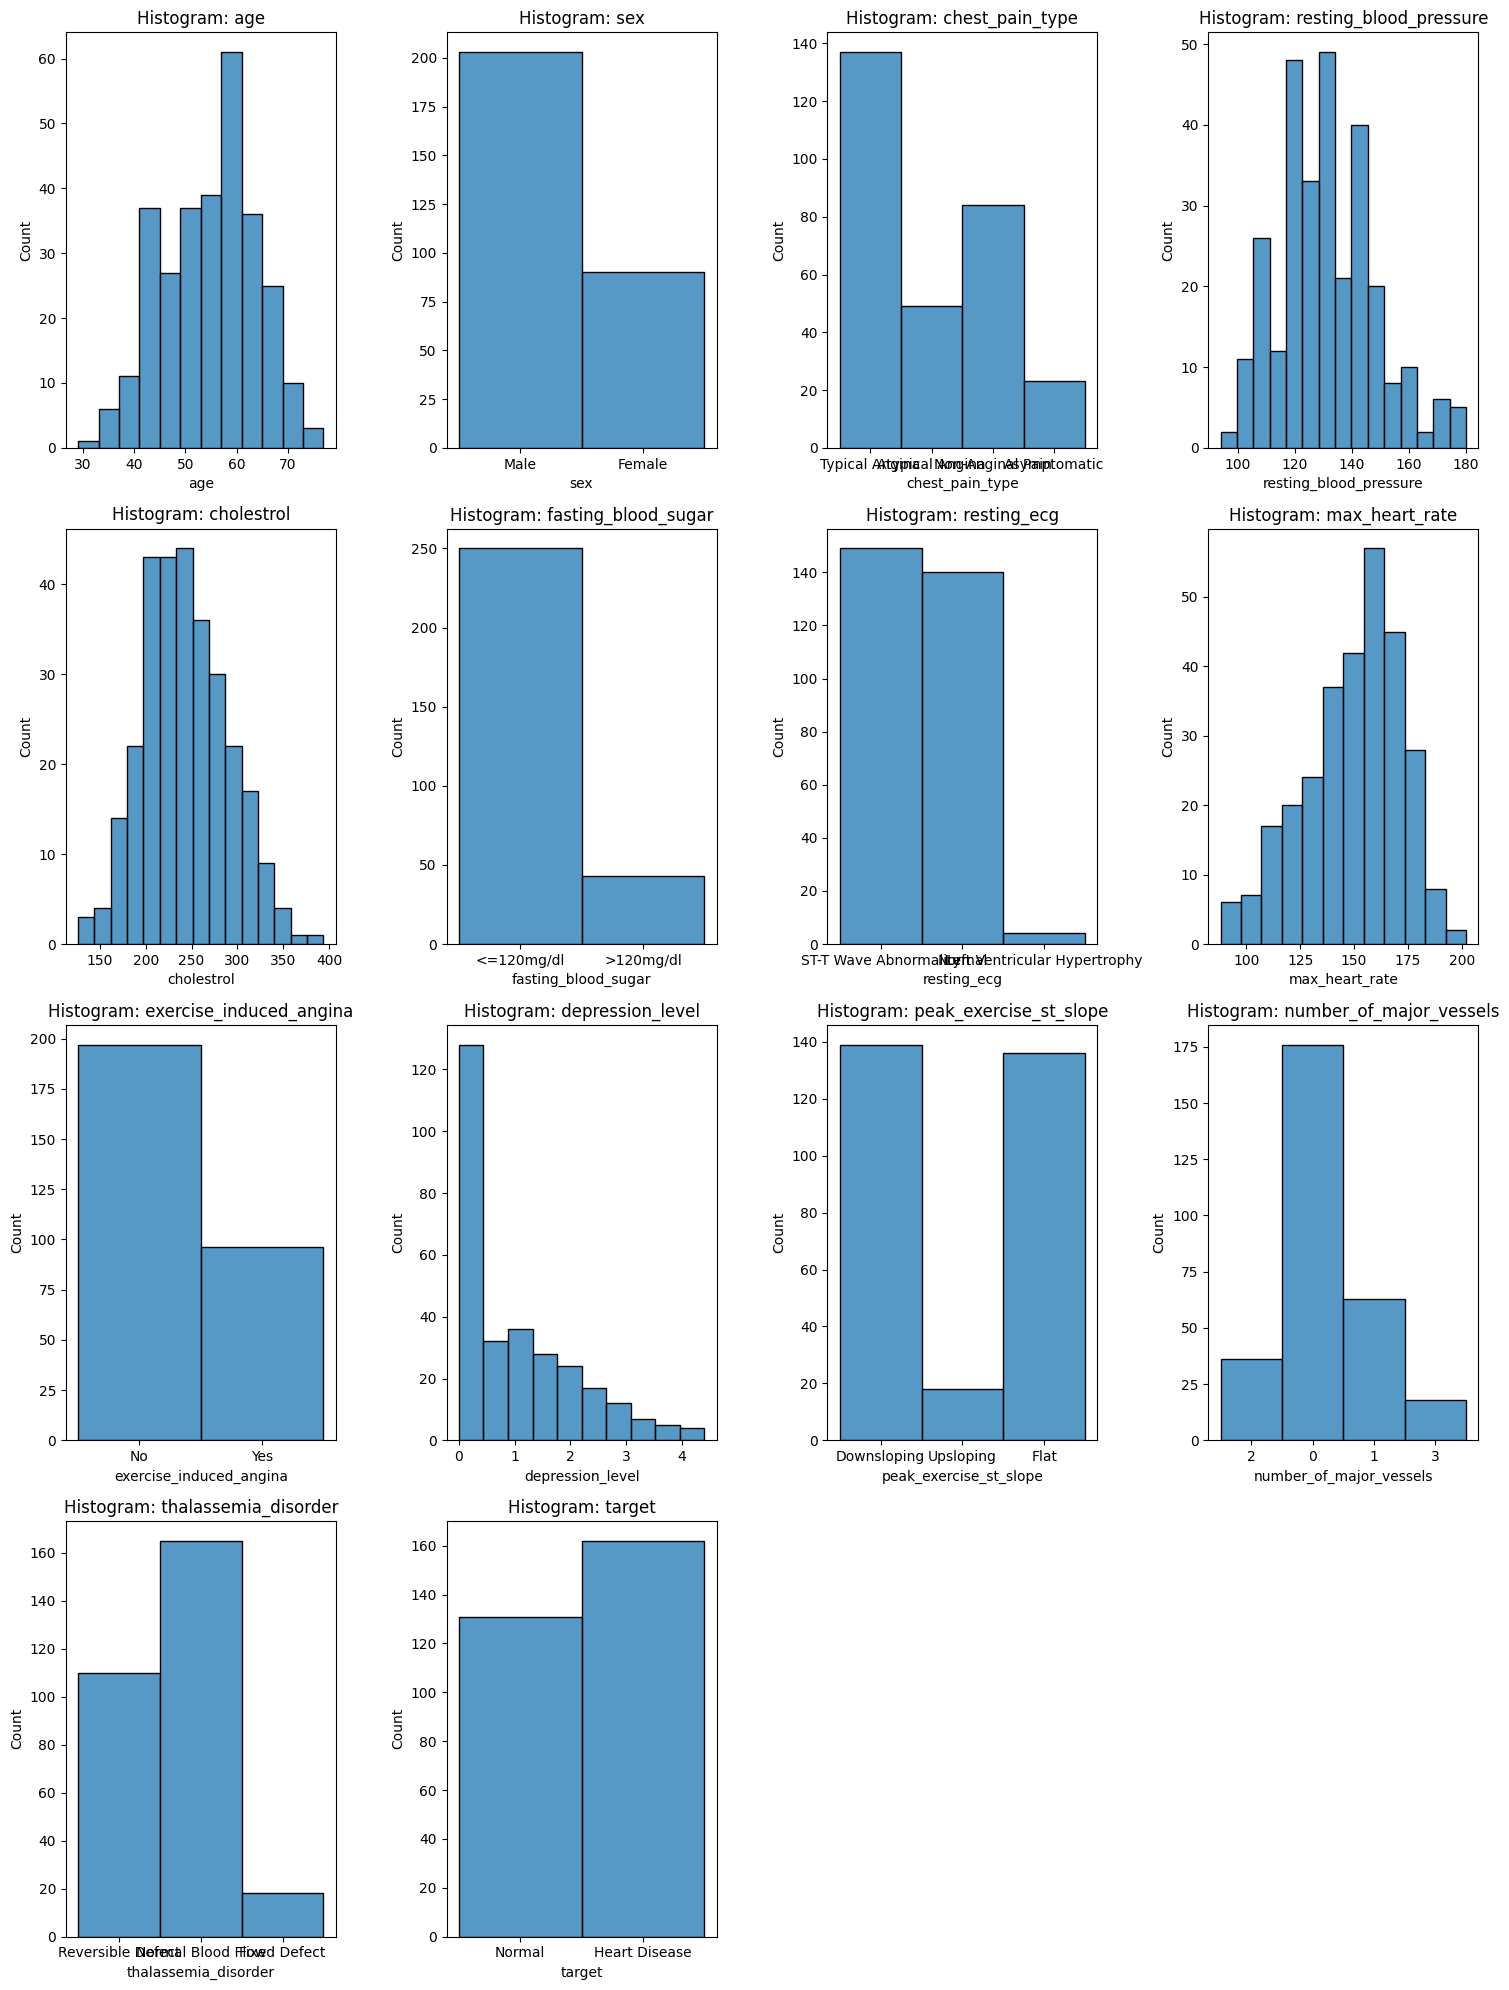

In [20]:
# overview of data in histogram
df_h = df_clean.copy()
num_plots = len(df_h.columns)
columns_per_row = 4
num_rows = math.ceil(num_plots / columns_per_row)

fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 5*num_rows))
axes = axes.ravel()

for i, col in enumerate(df.columns):
    sns.histplot(df_h[col], ax=axes[i])
    axes[i].set_title(f'Histogram: {col}')

# Remove extra axes
for j in range(num_plots, num_rows * columns_per_row):
    axes[j].remove()

plt.tight_layout()
plt.show()

In [21]:
df_clean

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,depression_level,peak_exercise_st_slope,number_of_major_vessels,thalassemia_disorder,target
0,52,Male,Typical Angina,125,212,<=120mg/dl,ST-T Wave Abnormality,168,No,1.0,Downsloping,2,Reversible Defect,Normal
1,53,Male,Typical Angina,140,203,>120mg/dl,Normal,155,Yes,3.1,Upsloping,0,Reversible Defect,Normal
2,70,Male,Typical Angina,145,174,<=120mg/dl,ST-T Wave Abnormality,125,Yes,2.6,Upsloping,0,Reversible Defect,Normal
3,61,Male,Typical Angina,148,203,<=120mg/dl,ST-T Wave Abnormality,161,No,0.0,Downsloping,1,Reversible Defect,Normal
4,62,Female,Typical Angina,138,294,>120mg/dl,ST-T Wave Abnormality,106,No,1.9,Flat,3,Normal Blood Flow,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,68,Female,Non-Anginal Pain,120,211,<=120mg/dl,Normal,115,No,1.5,Flat,0,Normal Blood Flow,Heart Disease
289,44,Female,Non-Anginal Pain,108,141,<=120mg/dl,ST-T Wave Abnormality,175,No,0.6,Flat,0,Normal Blood Flow,Heart Disease
290,52,Male,Typical Angina,128,255,<=120mg/dl,ST-T Wave Abnormality,161,Yes,0.0,Downsloping,1,Reversible Defect,Normal
291,59,Male,Asymptomatic,160,273,<=120mg/dl,Normal,125,No,0.0,Downsloping,0,Normal Blood Flow,Normal


From the histogram, we can observe that the distribution of the categorical variables like `sex`, `fasting_blood_sugar`, `resting_ecg`, `exercise_induced_angina`, `number_of_major_vessels`, and `thalassemia_disorder` are not evenly distributed. But the target variable, `target` is not having imbalance data. Therefore, we just keep the features of the categorical variables.

In [22]:
# save the clean data
filename = 'dataset/Heart_clean.csv'
df_clean.to_csv(filename, encoding='utf-8', index = None, header=True)

#### Data Visualization for Deeper Analysis
Let's try to investigate deeper on the relationship between two specific columns by refering on the question below:
1. Which gender has higher chance of getting heart disease?
2. Which chest pain type has highest possibilities to lead to heart disease?
3. Which major vessels number tend to detected as heart disease?
4. Which fields has the positive correlation to the patient age?

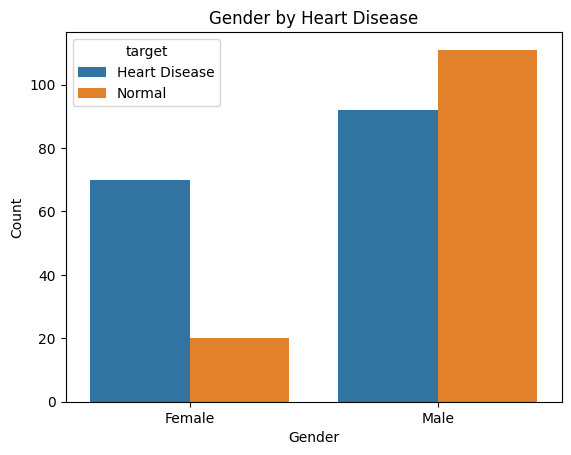

In [23]:
# Which gender has higher chance of getting heart disease?
df_gen_tar = df_clean.copy()

# Convert 'sex' and 'target' columns to appropriate data types
df_gen_tar['sex'] = df_gen_tar['sex'].astype(object)
df_gen_tar['target'] = df_gen_tar['target'].astype('category')

# Group by 'sex' and 'target' columns and count occurrences
df_gen_tar = df_gen_tar.groupby(['sex', 'target'], as_index=False)['age'].count()

# Create column chart using Seaborn
sns.barplot(x='sex', y='age', hue='target', data=df_gen_tar)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender by Heart Disease')
plt.show()

Male tends to have higher chance of getting heart disease than female.

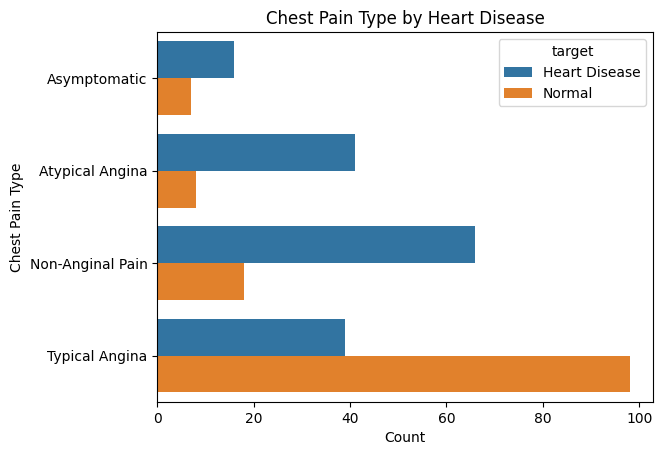

In [24]:
# Which chest pain type has highest possibilities to lead to heart disease?
df_cp_tar = df_clean.copy()

# Convert 'cp' and 'target' columns to appropriate data types
df_cp_tar['chest_pain_type'] = df_cp_tar['chest_pain_type'].astype(object)
df_cp_tar['target'] = df_cp_tar['target'].astype('category')

# Group by 'cp' and 'target' columns and count occurrences
df_cp_tar = df_cp_tar.groupby(['chest_pain_type', 'target'], as_index=False)['age'].count()

# Create horizontal column chart using Seaborn
sns.barplot(x='age', y='chest_pain_type', hue='target', data=df_cp_tar, orient='h')
plt.xlabel('Count')
plt.ylabel('Chest Pain Type')
plt.title('Chest Pain Type by Heart Disease')
plt.show()

Chest pain type (2) has the higest likelihood to be detected as heart disease

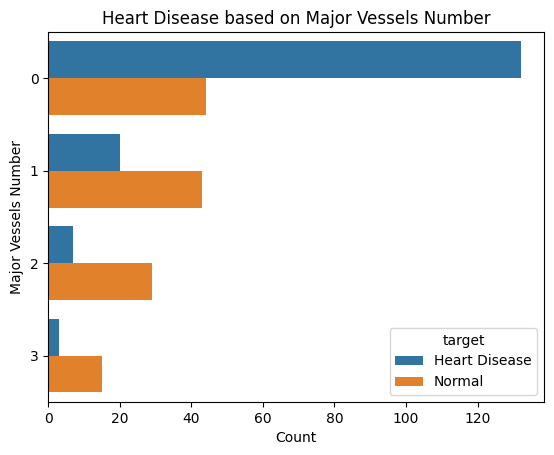

In [25]:
# Which major vessels number tend to detected as heart disease?
df_ca_tar = df_clean.copy()

# Convert 'ca' and 'target' columns to appropriate data types
df_ca_tar['number_of_major_vessels'] = df_ca_tar['number_of_major_vessels'].astype(object)
df_ca_tar['target'] = df_ca_tar['target'].astype('category')

# Group by 'cp' and 'target' columns and count occurrences
df_ca_tar = df_ca_tar.groupby(['number_of_major_vessels', 'target'], as_index=False)['age'].count()

# Create horizontal column chart using Seaborn
sns.barplot(x='age', y='number_of_major_vessels', hue='target', data=df_ca_tar, orient='h')
plt.xlabel('Count')
plt.ylabel('Major Vessels Number')
plt.title('Heart Disease based on Major Vessels Number')
plt.show()

Patient from 1 to 3 less likely to get heart disease on major vessels numbers while patient with 0 and 4 tend to get heart disease

### Data Transformation
Data transformation is a crucial step in data preprocessing that involves converting or modifying data in a way that makes it more suitable for analysis. There are several reasons why data transformation is necessary:

- **Data normalization**: 
  
  One of the primary reasons for data transformation is to normalize the data, which involves scaling the values of different variables to the same range. Normalization helps to prevent biases that can arise when one variable has much larger or smaller values than the others, and also ensures that the model is not sensitive to the units in which the data is measured.
  
- **Encoding categorical variables**: 
  
  Categorical variables, which take on discrete values rather than continuous values, cannot be used in their raw form in most machine learning models. Data transformation techniques such as one-hot encoding and label encoding can be used to convert categorical variables into numerical values that can be used in the analysis.
  
- **Feature engineering**: 
  
  Feature engineering is the process of creating new features or modifying existing features in a way that improves the performance of the model. Data transformation techniques such as log transformations, power transformations, and polynomial transformations can be used to create new features that capture the underlying patterns in the data.

In [26]:
# data transformation for binary, ordinal(ordinal-encoder) and non-ordinal(one-hot-encoder)
df_transform = df_clean.copy()

# binary transformation
df_transform['sex'] = df_transform['sex'].apply(lambda x: 1 if x == 'Male' else 0)
df_transform['fasting_blood_sugar'] = df_transform['fasting_blood_sugar'].apply(lambda x: 1 if x == '>120mg/dl' else 0)
df_transform['exercise_induced_angina'] = df_transform['exercise_induced_angina'].apply(lambda x: 1 if x == 'Yes' else 0)
df_transform['target'] = df_transform['target'].apply(lambda x: 1 if x == 'Heart Disease' else 0)

# ordinal transformation 
slope_enc = OrdinalEncoder(categories=[['Upsloping', 'Flat', 'Downsloping']])
df_transform['peak_exercise_st_slope'] = slope_enc.fit_transform(df_transform[['peak_exercise_st_slope']])
ca_enc = OrdinalEncoder(categories=[['0', '1', '2', '3']])
df_transform['number_of_major_vessels'] = ca_enc.fit_transform(df_transform[['number_of_major_vessels']])
thal_enc = OrdinalEncoder(categories=[['Normal Blood Flow', 'Fixed Defect', 'Reversible Defect']])
df_transform['thalassemia_disorder'] = thal_enc.fit_transform(df_transform[['thalassemia_disorder']])

# non-ordinal transformation
cpt_oh = pd.get_dummies(df_transform['chest_pain_type'], prefix='chest_pain_type')
restecg_oh = pd.get_dummies(df_transform['resting_ecg'], prefix='resting_ecg')

# Concatenate the original DataFrame with the one-hot encoded "chest_pain_type" and "resting_ecg" features
df_transform = df_transform.drop(columns=['chest_pain_type', 'resting_ecg'], axis=1).join([cpt_oh, restecg_oh])

# Rearange 'target' column to end of the dataframe
target_col = df_transform.pop('target')
df_transform['target'] = target_col

df_transform

,age,sex,resting_blood_pressure,cholestrol,fasting_blood_sugar,max_heart_rate,exercise_induced_angina,depression_level,peak_exercise_st_slope,number_of_major_vessels,thalassemia_disorder,chest_pain_type_Asymptomatic,chest_pain_type_Atypical Angina,chest_pain_type_Non-Anginal Pain,chest_pain_type_Typical Angina,resting_ecg_Left Ventricular Hypertrophy,resting_ecg_Normal,resting_ecg_ST-T Wave Abnormality,target
0,52,1,125,212,0,168,0,1.0,2.0,2.0,2.0,0,0,0,1,0,0,1,0
1,53,1,140,203,1,155,1,3.1,0.0,0.0,2.0,0,0,0,1,0,1,0,0
2,70,1,145,174,0,125,1,2.6,0.0,0.0,2.0,0,0,0,1,0,0,1,0
3,61,1,148,203,0,161,0,0.0,2.0,1.0,2.0,0,0,0,1,0,0,1,0
4,62,0,138,294,1,106,0,1.9,1.0,3.0,0.0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,68,0,120,211,0,115,0,1.5,1.0,0.0,0.0,0,0,1,0,0,1,0,1
289,44,0,108,141,0,175,0,0.6,1.0,0.0,0.0,0,0,1,0,0,0,1,1
290,52,1,128,255,0,161,1,0.0,2.0,1.0,2.0,0,0,0,1,0,0,1,0
291,59,1,160,273,0,125,0,0.0,2.0,0.0,0.0,1,0,0,0,0,1,0,0


In [27]:
# save the transform  data
filename = 'dataset/Heart_transform.csv'
df_transform.to_csv(filename, encoding='utf-8', index = None, header=True)

### Data Correlation
The heatmap is used to check the correlation between the feature variables and target variable. The correlation coeficient is in the range of `-1 to 1` that indicates the strength and direction of the linear relationship between the two variables. A correlation coefficient of **1** indicates a perfect positive correlation, while a correlation coefficient of **-1** indicates a perfect negative correlation. A correlation coefficient of **0** indicates no linear correlation between the variables.

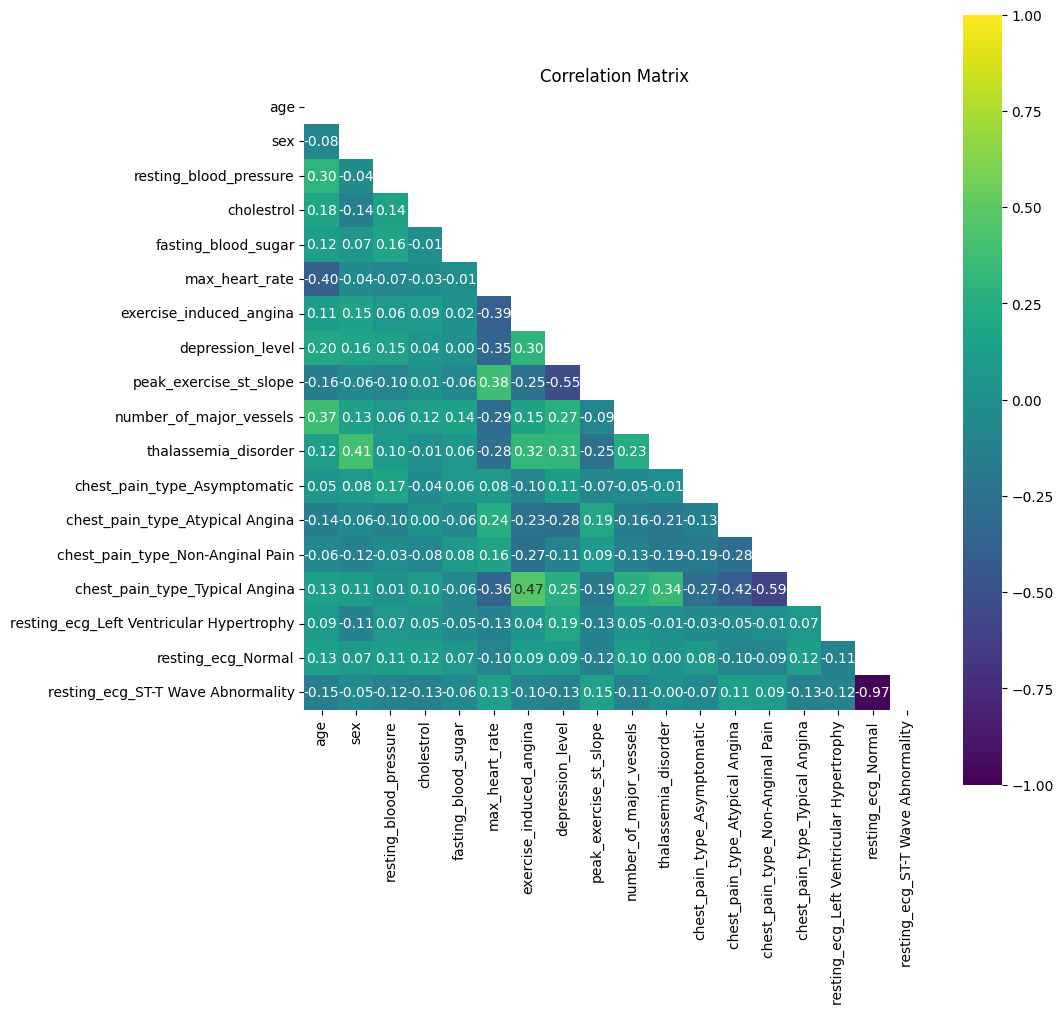

In [28]:
df_corr = df_transform.copy()

# Create a copy of the DataFrame with the target variable dropped
df_corr = df_corr.drop('target', axis=1)

# Create a correlation matrix
corr_matrix = df_corr.corr()

# Create a mask to hide the upper triangular portion of the heatmap
mask = np.zeros_like(corr_matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10,10))

# Create a heatmap of the correlation matrix using seaborn
sns.heatmap(corr_matrix, cmap='viridis', annot=True, vmin=-1, vmax=1, mask=mask, fmt=".2f", square=True, ax=ax)

# Set the title of the plot
ax.set_title('Correlation Matrix')

# Show the plot
plt.show()

In [29]:
# Create a correlation matrix with the target variable included
corr_with_target = df_transform.corr()['target'].sort_values(ascending=False)

# Print the correlation values
print(corr_with_target)

target                                      1.000000
max_heart_rate                              0.424389
peak_exercise_st_slope                      0.330494
chest_pain_type_Non-Anginal Pain            0.296858
chest_pain_type_Atypical Angina             0.255824
resting_ecg_ST-T Wave Abnormality           0.173253
chest_pain_type_Asymptomatic                0.083798
fasting_blood_sugar                        -0.034428
resting_ecg_Left Ventricular Hypertrophy   -0.071673
cholestrol                                 -0.104693
resting_blood_pressure                     -0.116645
resting_ecg_Normal                         -0.156749
age                                        -0.222376
sex                                        -0.301157
depression_level                           -0.424826
exercise_induced_angina                    -0.439908
number_of_major_vessels                    -0.459706
chest_pain_type_Typical Angina             -0.505567
thalassemia_disorder                       -0.

From the correlation heatmap, `fasting_blood_sugar` has the least correlation coefficient to target which is closest to 0

In [30]:
# Function to plot scatter plot
def scatter_plot_with_correlation(x, y, title=None):
    """
    Create a scatter plot with correlation line.
    
    Parameters:
        - x: array-like, x-axis data
        - y: array-like, y-axis data
        - title: str, title for the plot (optional)
    """
    # Create scatter plot
    plt.scatter(x, y, alpha=0.5)

    # Calculate correlation coefficient
    corr_coef = np.corrcoef(x, y)[0, 1]

    # Add correlation line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red', linestyle='--', label=f'Correlation: {corr_coef:.2f}')
    
    # Set plot title and labels
    if title:
        plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    
    # Add legend
    plt.legend()
    
    # Show the plot
    plt.show()

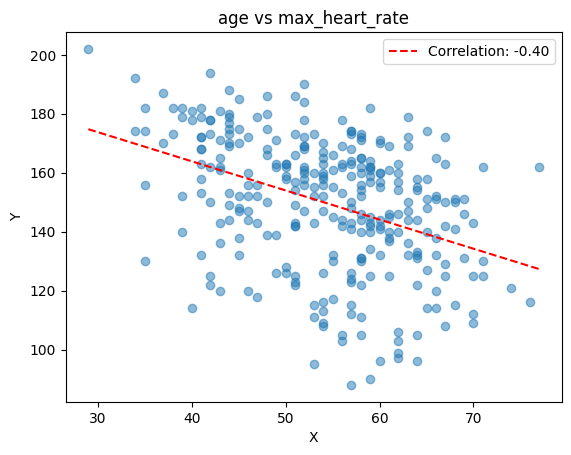

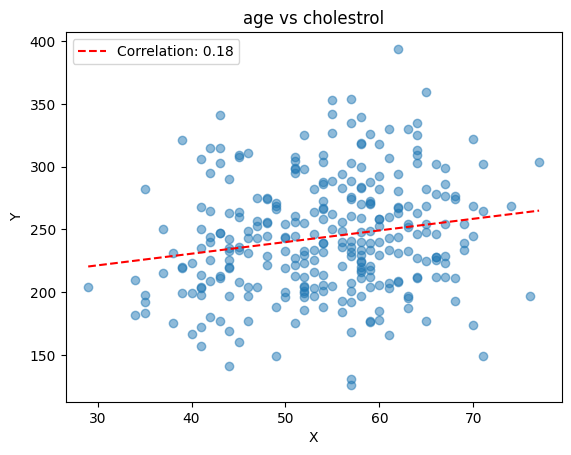

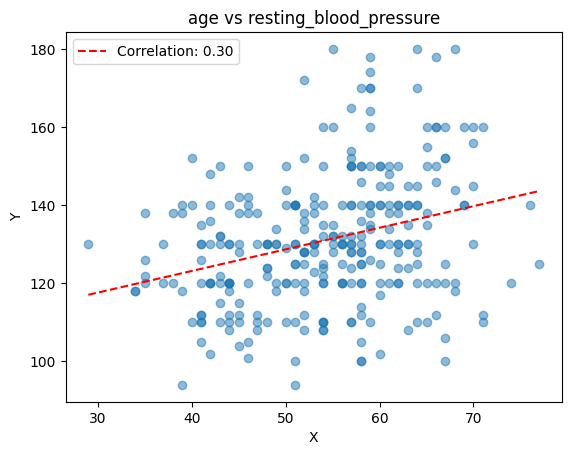

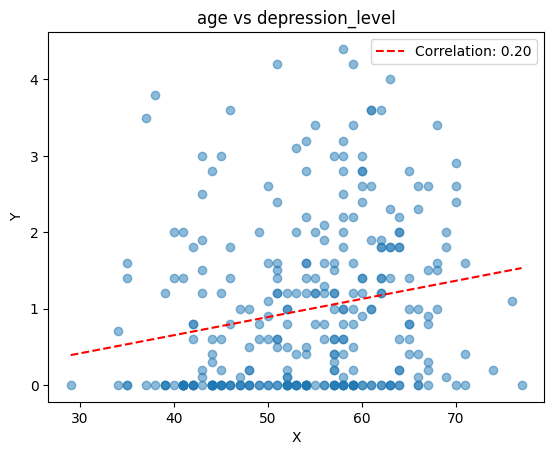

In [31]:
# Create a scatter plot to visualize the relationship between two numerical variables
df_scatter = df_transform.copy()
scatter_plot_with_correlation(df_scatter['age'], df_scatter['max_heart_rate'], title='age vs max_heart_rate')
scatter_plot_with_correlation(df_scatter['age'], df_scatter['cholestrol'], title='age vs cholestrol')
scatter_plot_with_correlation(df_scatter['age'], df_scatter['resting_blood_pressure'], title='age vs resting_blood_pressure')
scatter_plot_with_correlation(df_scatter['age'], df_scatter['depression_level'], title='age vs depression_level')

From the scatter plots, 'resting_blood_pressure', 'cholestrol' and 'depression_level' has higher correlation with the patient age but 'max_heart_rate' no

## Machine Learning

In [32]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

# copy df
df_lp = df_transform.copy()

# separate features and target variable
X = df_lp.drop('target', axis=1)
y = df_lp['target']

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# fit and predict using multiple machine learning models
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# print the accuracy score of each model
print(models)

100%|██████████| 29/29 [00:01<00:00, 15.54it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearSVC                          0.85               0.84     0.84      0.84   
CalibratedClassifierCV             0.85               0.84     0.84      0.84   
RandomForestClassifier             0.83               0.83     0.83      0.83   
RidgeClassifierCV                  0.83               0.82     0.82      0.83   
RidgeClassifier                    0.83               0.82     0.82      0.83   
LinearDiscriminantAnalysis         0.83               0.82     0.82      0.83   
LogisticRegression                 0.81               0.81     0.81      0.81   
KNeighborsClassifier               0.81               0.81     0.81      0.81   
NuSVC                              0.81               0.81     0.81      0.81   
BernoulliNB                        0.80               0.80     0.80      0.80   
ExtraTreesClassifier        

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import joblib

# copy df
df_dt = df_transform.copy()

# separate features and target variable
X = df_dt.drop('target', axis=1)
y = df_dt['target']

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# fit the model using the training data
clf.fit(X_train, y_train)

# make predictions using the test data
y_pred = clf.predict(X_test)

# evaluate the model using accuracy, f1 score, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('F1 Score:', f1)
print('Confusion Matrix:\n', cm)

Accuracy: 0.7288135593220338
F1 Score: 0.7419354838709677
Confusion Matrix:
 [[20  8]
 [ 8 23]]


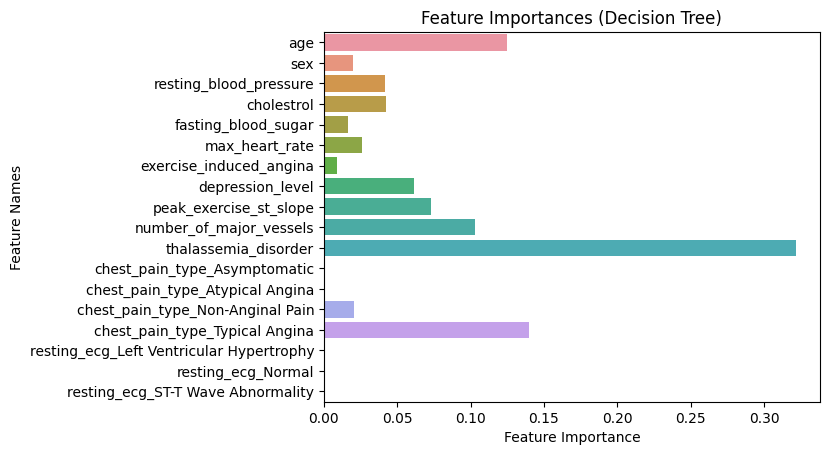

In [34]:
# Access feature importances from the trained model (Decision Tree, Random Forest)
feature_importances = clf.feature_importances_

# Create a bar chart to visualize feature importances
sns.barplot(x=feature_importances, y=X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importances (Decision Tree)')
plt.show()

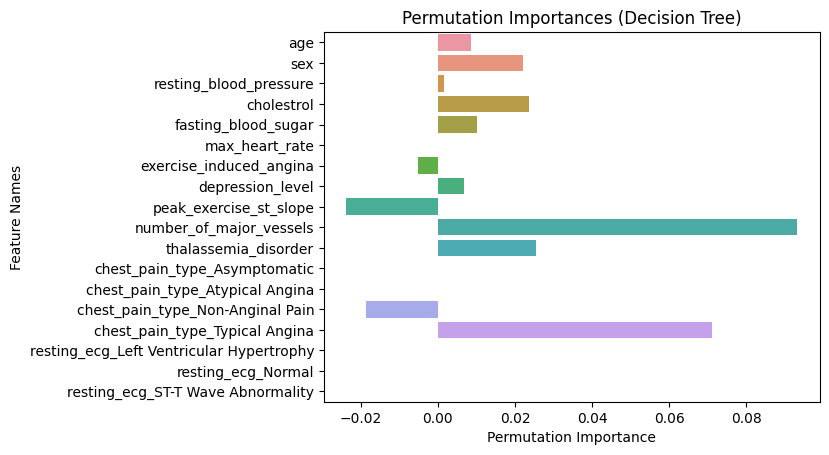

In [35]:
from sklearn.inspection import permutation_importance

# Compute permutation importances (Logistic regression, SVMs)
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Access feature importances from permutation importances
feature_importances = result.importances_mean

# Create a bar chart to visualize feature importances
sns.barplot(x=feature_importances, y=X.columns)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature Names')
plt.title('Permutation Importances (Decision Tree)')
plt.show()

In [36]:
# save the model
joblib.dump(clf, 'trained_model/decision_tree_model.joblib')

['trained_model/decision_tree_model.joblib']

In [39]:
# test with trained model
# select from existing saved data, df_transform
df_test = df_transform.copy()
df_test = df_test.drop('target', axis=1)

row_values = df_test.loc[df_test.index == 100].values.tolist()
# print(row_values)

# # test model with only features
X = np.array(row_values).reshape(1, -1)
# print(X)

# load the trained model
clf = joblib.load('trained_model/decision_tree_model.joblib')

# make predictions using the loaded model
y_pred = clf.predict(X)

predicted_labels = ['detected' if pred == 1 else 'not-detected' for pred in y_pred]

# print the predictions
print('Predictions:', predicted_labels)

Predictions: ['detected']


## Logistic Regression

Logistic regression is oftenly used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables.